In [5]:
from Bio import SeqIO

# Загружаем файл
record = SeqIO.read("../data/human_mt.gb", "genbank")

# Общая информация
print(f"Название: {record.name}")
print(f"Описание: {record.description}")
print(f"Длина последовательности: {len(record.seq)} нуклеотидов")

# Подсчёт GC%
from Bio.SeqUtils import gc_fraction
gc = gc_fraction(record.seq) * 100
print(f"GC-состав: {gc:.2f}%")

# Собираем информацию о функциях (генах)
genes = []
for feature in record.features:
    if feature.type == "gene":
        gene_name = feature.qualifiers.get("gene", ["-"])[0]
        start = int(feature.location.start)
        end = int(feature.location.end)
        strand = feature.location.strand
        genes.append((gene_name, start, end, strand))

# Показываем первые 5 генов
print("\nПервые 5 генов:")
for gene in genes[:5]:
    print(gene)


Название: NC_012920
Описание: Homo sapiens mitochondrion, complete genome
Длина последовательности: 16569 нуклеотидов
GC-состав: 44.36%

Первые 5 генов:
('TRNF', 576, 647, 1)
('RNR1', 647, 1601, 1)
('TRNV', 1601, 1670, 1)
('RNR2', 1670, 3229, 1)
('TRNL1', 3229, 3304, 1)


In [13]:
from Bio import SeqIO
import pandas as pd

# Загружаем файл
record = SeqIO.read("../data/human_mt.gb", "genbank")

# Собираем аннотации генов
gene_data = []

for feature in record.features:
    if feature.type in ["gene", "CDS", "tRNA", "rRNA"]:
        gene_name = feature.qualifiers.get("gene", ["-"])[0]
        gene_type = feature.type
        start = int(feature.location.start)
        end = int(feature.location.end)
        strand = feature.location.strand
        gene_data.append({
            "gene": gene_name,
            "type": gene_type,
            "start": start,
            "end": end,
            "strand": strand
        })

# Создаём таблицу
df_genes = pd.DataFrame(gene_data)

# Сохраняем в файл
df_genes.to_csv("../results/human_mt_genes.csv", index=False)

# Показываем первые 5 строк
df_genes.head()

,gene,type,start,end,strand
0,TRNF,gene,576,647,1
1,TRNF,tRNA,576,647,1
2,RNR1,gene,647,1601,1
3,RNR1,rRNA,647,1601,1
4,TRNV,gene,1601,1670,1


In [15]:
!pip install dna_features_viewer

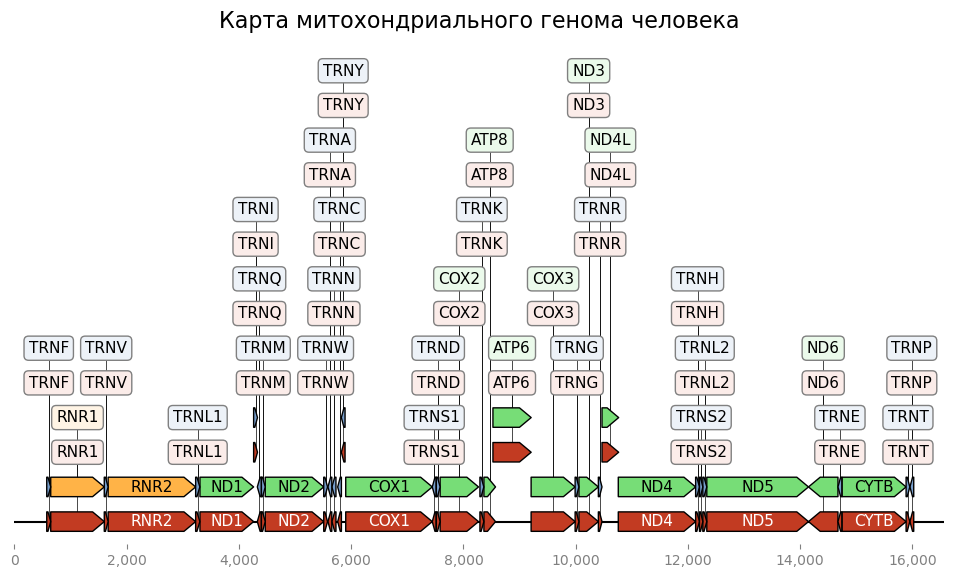

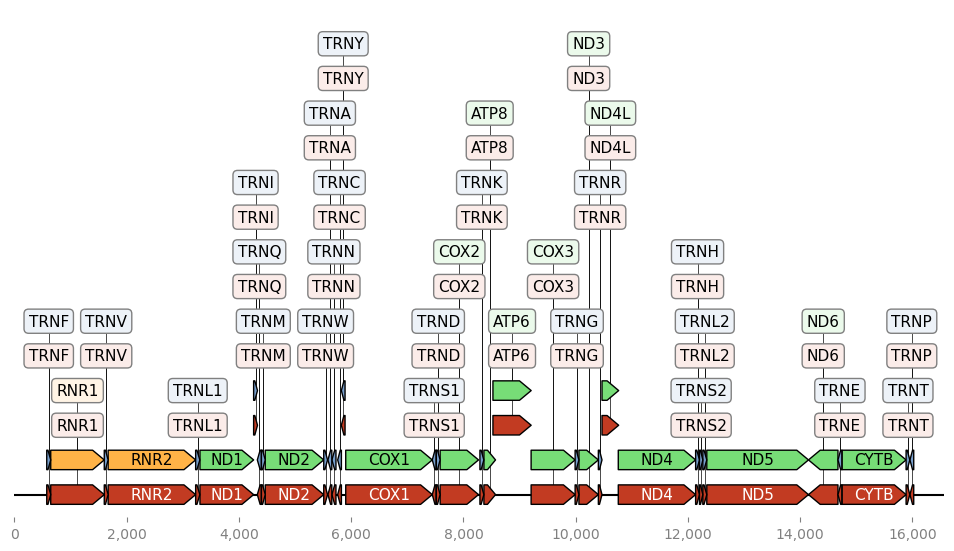

In [19]:
import pandas as pd
from dna_features_viewer import GraphicRecord, GraphicFeature
import os

# Загружаем данные
df = pd.read_csv("../results/human_mt_genes.csv")

# Создаём список фичей
features = []

color_map = {
    "CDS": "#77dd77",   # зелёный
    "tRNA": "#779ecb",  # синий
    "rRNA": "#ffb347",  # оранжевый
    "gene": "#c23b22"   # тёмно-красный
}

for _, row in df.iterrows():
    feature = GraphicFeature(
        start=row["start"],
        end=row["end"],
        strand=row["strand"],
        label=row["gene"],
        color=color_map.get(row["type"], "#cccccc")
    )
    features.append(feature)

# Создаём объект GraphicRecord
record = GraphicRecord(sequence_length=16569, features=features)

# Рисуем
ax, _ = record.plot(figure_width=12)
ax.set_title("Карта митохондриального генома человека", fontsize=16)

# Сохраняем как PNG
os.makedirs("../results", exist_ok=True)
record.plot(figure_width=12)[0].figure.savefig("../results/human_mt_genome_map.png", dpi=300)